# Python Classes

You can find the most recent 3.x version documentation [here](https://docs.python.org/3/tutorial/classes.html)

## Intro to Object Oriented Programming (OOP)

There are 2 types of [programming paradigms](http://en.wikipedia.org/wiki/Programming_paradigm) (or methods) for structuring your code.

1. The first is object-oriented programming - or OOP. It is a way to structure a program by creating an **object** - a grouping of related properties & behaviors. An object could represent a car with **properties** like make, model, and color. It could address **behaviors** such as driving forward, reverse, and use wipers.

    _Object-oriented programming is an approach for modeling real world items and their interations._

2. The 2nd is **procedural programming** where program structures are a set of steps, functions, and code blocks that are completed sequentially to complete a task.

## Intro to Classes

Classes are like blueprints for **objects** - also known as **instances** of a class (which contains real data - not just the shell). They are user (programmer) defined data structures.

Classes are what allow you to create new data types - which means new _instances_ of that type can be made. These data types can have things like:
- attributes for maintaining the object's state (e.g.:  eye color, name, etc)
- methods (functions that can be run against the instance) for modifying it's state

But these are just the main key components. Python classes provide all the same standard features of Object Oriented Programming:
- [class inheritance](https://docs.python.org/3/tutorial/classes.html#inheritance)
- arbitrary amounts & kinds of data
- created at runtime
- can be modified after creation

Built-in types (classes already built into python) can be used as base classes for extension by a user or developer.

Special syntax (_e.g.:  arithmetic operators_) can also be redefined for class instances.

Before we get started, you may not be aware that there is something called [PEP 3107 - function annotation](https://www.python.org/dev/peps/pep-3107/). This can come in very handy later on down the line & it is highly suggested you use this.

## Scopes & Namespaces

### namespaces

When you hear the term _**namespace**_ it refers to a mapping from names to objects. Most are currently implemented as Python dictionaries but may change in the future.

Things to note for **_namespaces_**:
- there is no relation between names in different namespaces
- when using dot notation, items after the `.` are generally referred to as attributes:  `class_obj.attr1`
- they are created at different moments & have different lifetimes (_e.g.:  namespace for builtin names when interpreter starts up; global namespace when module is used; function namespace is created when called and lasts until function ends_)

Class definitions (creations of new classe instances) essentially creates additional namespaces in the local scope.

### scopes

This is how your program accesses variables, objects, and other pieces of your program. It's the region where a namespace is directly accessible. Here it refers to the idea that if you were to try to acess something the "local" namespace hasn't heard of, you will run into an error.

When trying to access something, the scope with which the program looks starts from the inside out:
1. innermost scope:  _what is in my local (immediate) namespace?_
2. enclosed functions scope:  _what is surrounding the local namespace, starting with the nearest enclosing scope? **--- contains non-local and non-global names**_
3. current module's global names
4. namespace with built-in names

If a name (label) is declared global, then all references (pointers) and assignments (changing of data) have their namespace starting in that 3rd layer - the layer containing a module's global names.

In order to access variables outside the local (level 1) scope, you need to indicate so with the `nonlocal` statement in front of the variable name. If you do not utilize either this [nonlocal](https://docs.python.org/3/reference/simple_stmts.html#nonlocal) or [global](https://docs.python.org/3/reference/simple_stmts.html#global) statement, the original variables become **read-only** and an attempt to overwrite the original data will simply create a _new_ local variable in the innermost scope leaving original unchanged.

What's the difference between **global** and **nonlocal**?
_**nonlocal** tells the interpreter to look at the enclosing scope, whereas **global** indicates the global scope._

As a reminder, when you delete an object with `del var` (for example) you are removing the binding of the text from the namespace referened by the local scope.

Below is an example of python code that demonstrates these scope & namespace concepts from official documentation:
```python
def scope_test():
    # this is the main function that is originally called
    
    def do_local():
        # this represents local namespace & scope (nothing changed to original spam)
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam
        spam = "global spam"

    spam = "test spam"
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam)

scope_test()
print("In global scope:", spam)
```

You can see how the **nonlocal** and **global** options affect variable binding - and how it could potentially introduce bugs when accidentally changing data.

# The New Language Of Classes

If you've taken my [python basics bootcamp](https://prosperousheart.com/python-bootcamp) or have reviewed my free educational material on GitHub, you have the basics for programming in Python. But classes are an extension to create a wider realm of possibility.

## Class Syntax

There is a specific structure in how python interpreter expects to see classes written. In it's simplest pseudocode, a class definition looks like this:

```python
class ClassName:
    <statement-0>
    .
    .
    .
    <statement-N>
```

Similar to functions there is a declarative statement (**class**) that is required for execution to have effect. And although not required, the [class naming convention](https://www.python.org/dev/peps/pep-0008/#class-names) is camel casing or CapWords.

Within a new class, there are likely functions but other statements are allowed - sometimes even useful! These functions normally have a specific argument list.

When a new object is instantiated from these classes, a new namespace is created and then used as a local scope for that object. This _class object_ essentially acts as a wrapper around this namespace, and changes can be made upon that object that do not necessarily affect that instance of it.

## [Class Objects](https://docs.python.org/3/tutorial/classes.html#class-objects)

When it comes to classes, there are 2 supported operations:
1. attribute references (accessing and/or manipulating data)
2. instantiation (creation of new class objects)

**NOTE:**  you may see two terms throughout this training:
1. `instance variable`
2. `class variable`

    **Instance variables** are the unique data related to a specific instance (creation) of a class.
    
    **Class variables** are attributes and methods shared by all instances (creations) of a class.

```python
class Dog:
    
    # class variable shared by all instances
    kind = 'canine'

    def __init__(self, name, eye_c, breed):
        # instance variables unique to each instance
        self.name = name
        self.eye_color = eye_c
        self.breed = breed
```

### Attribute References

Every time you create a class object, you create an _instance_ of that object ... Meaning a piece of code with:
- **class attributes** where all instances of that class type have the same value (e.g.:  dog species)
- **instance attributes** where the attribute values are specific to the instance, not the class (e.g.:  eye color)

And each instance points to a different location for the data.

One of the biggest advantages of using classes to organize data is that instances are guaranteed to have the attributes you expect.

#### Class Attributes

**Class attributes** are defined directly beneath the class name and indented by 4 spaces with some initial value.

These should be used to define properties that should have the same value for every class instance.

#### Instance Attributes

So when thinking of creating classes, think of all the base attributes. For example ...

If you were to create a class for a cat, what attributes would it have?
- number of legs
- color of fur
- sex
- age
- eye color

And the list could go on. Each of these attributes, you would have the ability to update a particular instance vs all cats.

You access each attribute by using __dot notation__ like so:<br>
`new_cup.staves = 10`

This is the standard syntax for all attribute references (class or instance), whether built-in or user-defined:  `obj.name`

Valid attribute names are the ones in a class's namespace when the object was created and are either:
- data attributes:  do not need to be declared because they are created upon instantiation (creation)
- methods (function that belongs to an object)

<div class="alert alert-success">
    
```python
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'
```
</div>

In the above example from official documentation, attributes of the **MyClass** class are as follows:
- `MyClass.i` returns an integer
- `MyClass.f` returns a function or **method object** (meaning until you call the method, it simply stores the method object)

    ```python
    x = MyClass()
    xf = x.f  # stores the function, but it's not called yet
    xf()  # will call the actual function - would be the same as x.f()
    ```

You can also update an attribute with an assignment operation such as:  `MyClass.i = 42`

#### Warning For Mutable Attributes

What do you think would happen if you ran the below code?

```python
class Dog:

    tricks = []             # mistaken use of a class variable

    def __init__(self, name):
        self.name = name

    def add_trick(self, trick):
        self.tricks.append(trick)

d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')
d.tricks
```

Is it what you would expect of 2 dogs if you only taught one trick per dog?

_How would you fix the above code?_ Move the **tricks** class attribute into the `__init__` function so each "new dog" has it's own set of tricks.

Should you have an attribute name in a class and it's instance, the lookup prioritizes the instance.

### Class Object Instantiation

When creating a new object from a class, you are **instantiating** an object. You are creating an instance of a class object, which means each new instantiation has it's own memory address. And if you tried to compare 2 instances of a class object, it would return False.

In order to create a new instance, you would type the name of the class followed by opening and closing parentheses:  `ClassName()`

If there are no required input parameters that do not already have a default value, then you would see something like `varName = MyClass()` to create a new instance of the **MyClass** variable and assigns it to the **local** variable `temp`.

If you [use proper docstrings](https://www.python.org/dev/peps/pep-0257/) you can always run the function (or call the function attribute on an object) `.__doc__` to learn more about the object - data, function, module, etc.

<div class="alert alert-warning">
What would be returned if you ran:
    
```python
class MyClass:
    """A simple example class"""
    i = 12345

    def f(self):
        return 'hello world'
        
temp = MyClass()
temp.__doc__
```
</div>

This is called a **dunder method** - aka a "magic method".

# Class Methods & Functions

Often, the first argument of a method (even if not in a class) starts with `self` & is nothing more than convention. However, depending on other automated pieces in your environment it may cause an issue if you do not use it.

Methods can call other methods by using method attributes of the `self` argument, such as:

```python
class Bag:
    def __init__(self):
        self.data = []

    def add(self, x):
        self.data.append(x)

    def addtwice(self, x):
        self.add(x)
        self.add(x)
```

There are 3 different types of methods, which are explained [here](https://realpython.com/instance-class-and-static-methods-demystified).

## 3 Types Of Class Methods

Below is an [example from RealPython](https://realpython.com/instance-class-and-static-methods-demystified/#instance-class-and-static-methods-an-overview) on what the three methods might look like in a python program.

```python
class MyClass:
    def method(self):
        return 'instance method called', self

    @classmethod
    def classmethod(cls):
        return 'class method called', cls

    @staticmethod
    def staticmethod():
        return 'static method called'
```

All three methods can take in and number of other parameters not mentioned here.

### Instance Methods

This is a basic method type most commonly used. It takes (at minimum) one parameter (always first input):  `self`

This single parameter points to an **instance** of a class - a particular instantiation or creation of the class. It is through this parameter that instances can freely access attributes & other methods on the same object.

Instance methods also access the class itself through the `self.__class__` attribute. Which means it can modify the class state.

Additional information can also be found [here](https://realpython.com/python3-object-oriented-programming/#instance-methods).

### Class Methods

Instead of the `self` parameter, it takes the `cls` parameter (always first input). This points to the class as a whole. It can't modify the object itself, but it can modify the class state across all instances of the class.

This means you do not need an instance of the class to call these class methods.

A really great way to see this in action is with [this Pizza factory example](https://realpython.com/instance-class-and-static-methods-demystified/#delicious-pizza-factories-with-classmethod). It's a wonderful example of the [don't repeat yourself](https://en.wikipedia.org/wiki/Don't_repeat_yourself) principle.

### Static Methods

There are no required parameters for these.

These methods neither modify the obejct nor class states. They are restricted in what data they can access & are primarily a way to [namespace](https://realpython.com/python-namespaces-scope/) your methods.

These methods work like regular functions but belong to the class (and each instance's) namespace.

You can learn more about when to use statis methods [here](https://realpython.com/instance-class-and-static-methods-demystified/#when-to-use-static-methods).

## Magic Methods (Dunders)

This is a term you will hear among many programmer groups. These **magic methods** are special methods with double underscores at the beginning and end of their names. (*Also known as __dunder methods__!*)

These methods allow you to create functionality that can't be represented in a normal method.

There are a lot of methods available (such as those listed in [this article on GitHub](https://rszalski.github.io/magicmethods)) but the one you'll see most? Is the one that allows you to create an instance (or instantiate) an object of said class type.

Instantiating a class object (or "calling") create a base object - sometimes referred to as empty. But in reality, it's just the defaults assigned to it. You can change the initial "empty" state with the special **dunder method** `__init__`.

### `__init__`

The `__init__` dunder or magic method is the most important method within a class. This is the function of the class object that is called when an instance of the object is instantiated or created. It is also known as "the instance initiliazer" in Python - or the method (function) that sets the initial **state** of an object.

All `__init__` methods __must__ start with __*self*__ as the first parameter. This is what is automatically invoked when a new class object is created.

_NOTE:  This parameter indicates to Python that when calling __self__ you are referring to the INSTANCE that is calling the method, vs making a change to all instances._

<hr>

```python
class Wood_Cup:
    """
    This class is to create a wooden cup object.
    
    """
    
    def __init__(self, wood_type_obj = None, size = None, art_class_obj = None, handle_loc = "R", staves = 0):
        """
        This is the __init__ method which allows someone to create an instance of the Wood_Cup class.
        
        This function determines what attributes each instance of the class will have.
        
        """
        
        self.staves = staves
        self.wood_type = wood_type_obj
        self.art_class_obj = art_class_obj
        self.staves = staves
        self.size = size
```

<hr>

When creating or instantiating a new instance of a class, you do not need to add *__self__* as an input parameter.

Such as:  `new_cup = Wood_Cup("birch", "B", None, "L", 8)`

There are lots of built-in methods for classes that can really help to clean up your code as well as make it more pliable.

Another example from official documentation:

```python
class Complex:
    def __init__(self, realpart, imagpart):
        self.r = realpart
        self.i = imagpart

x = Complex(3.0, -4.5)
x.r, x.i
```

<div class="alert alert-warning">
How would you create a class object (instantiate a new object from the above MyClass) and then:<br>
    1. call <b>i</b><br>
    2. change <b>i</b><br>
    3. call <b>i</b>
</div>

There may even be times where you want to test for ambiguous input, such as a string or [DateTime](https://docs.python.org/3/library/datetime.html) object when expecting a date. Check out [this](https://realpython.com/python-multiple-constructors/) for how you can do that. Or if you're interested in checking out a new option with python 3.10, check out [structural pattern matching](https://realpython.com/python310-new-features/#structural-pattern-matching).

# [Class Inheritance](https://docs.python.org/3/tutorial/classes.html#inheritance)

When we refer to inheritance, it is the ability to utilize another calss's structure as a "base" for a new class - the process where one class takes on the attributes & methods of another. The syntax is as follows:

```python
class DerivedClassName(BaseClassName):
    <statement-0>
    .
    .
    .
    <statement-N>
```

`BaseClassName` must be defined in a scope that contained the creation (definition) of `DerivedClassName`. If a base class is defined in another module, the syntax might look like this:

```python
class DerivedClassName(modname.BaseClassName):
    <statement-0>
    .
    .
    .
    <statement-N>
```

Even if you don't see all of the attributes in your `DerivedClassName`, if you attempt to utilize an attribute or function your base class has the itnerpreter will look to your base class(es) for this information.

Additional insight can be found [here](https://realpython.com/python3-object-oriented-programming/#inherit-from-other-classes-in-python).

## Caution With Overriding Base Attributes

It is possible to have a method in your `DerivedClassName` that replaces a base class method or attribute ... But you can also write your code so that the new class instead extends functionality.

## Built-In Inheritance Functions

1. [`isinstance(obj, sysinfo)`](https://docs.python.org/3/library/functions.html#isinstance)
    - returns True (or 1) if the `object` argument is an instance (or subclass) of the `classinfo` object -- otherwise False (or 0)
    - (as of ver 3.10) if `classinfo` is a tuple of objects (or recursive tuples) OR a [Union type](https://docs.python.org/3/library/stdtypes.html#types-union) of multiple items, this returns True (or 1) when `object` is an instance of ANY entry --- otherwise a [TypeError](https://docs.python.org/3/library/exceptions.html#TypeError) subclass of [exception](https://github.com/ProsperousHeart/Basics-Boot-Camp/blob/main/Week_3/Python_Basics_18_-_Exceptions_%26_Assertions.ipynb) is raised.


2. [`issubclass(class, classinfo)`](https://docs.python.org/3/library/functions.html#issubclass)
    - a class is considered a subclass of itself
    - returns True (or 1) if a `class` is a subclass (direct, indirect, or [virtual](https://docs.python.org/3/glossary.html#term-abstract-base-class)) of `classinfo`
    - (as of ver 3.10) if `classinfo` is a tuple of objects OR a [Union type](https://docs.python.org/3/library/stdtypes.html#types-union), this returns True (or 1) when `object` is a subclass of ANY of the types --- otherwise a [TypeError](https://docs.python.org/3/library/exceptions.html#TypeError) subclass of [exception](https://github.com/ProsperousHeart/Basics-Boot-Camp/blob/main/Week_3/Python_Basics_18_-_Exceptions_%26_Assertions.ipynb) is raised.

## [Multiple Inheritance](https://docs.python.org/3/tutorial/classes.html#multiple-inheritance)

When a new class type is created, you can pull from multiple base classes. This class definition might look something like this:

```python
class DerivedClassName(Base0, ..., BaseX):
    <statement-0>
    .
    .
    .
    <statement-N>
```

**_How does the interpreter know where to look?_**

1. looks internaly to itself (the class) - _does that attribute/method reside in `DerivedClassName`?_
2. looks at first base class in the input parameter of class definition
    - in this example, looks in Base0
    - if not found there, looks in it's parent classes recursively
3. if not found in 1st base class, it will recursively check all of the rest

It's a bit more complex than the above. If yowant to get mroe into inheritance, be sure to check out the documentation for [`super()`](https://docs.python.org/3/library/functions.html#super) as well as [this guide to using `super()`](https://rhettinger.wordpress.com/2011/05/26/super-considered-super/). You can also use [this method resolution order](https://www.python.org/download/releases/2.3/mro/) doc.

# [Iterators In Your Classes](https://docs.python.org/3/tutorial/classes.html#iterators)

You have the ability to make a class be an iterable! Meaning you can put an instance of a class inside the [`iter(obj)`](https://docs.python.org/3/library/functions.html#iter) built-in function.

They use the dunder method [`__next__()`](https://docs.python.org/3/library/stdtypes.html#iterator.__next__) so you can use the [`next()`](https://docs.python.org/3/library/functions.html#next) function.

Here is a (tweaked) example from official documentation for reading in a string of charactrs backwards:

```python
class Reverse:
    """Iterator for looping over a sequence backwards."""
    def __init__(self, data):
        self.data = data
        self.index = len(data)

    def __iter__(self):
        return self

    def __next__(self):
        if self.index == 0:
            raise StopIteration
        self.index = self.index - 1
        return self.data[self.index]

rev = Reverse(input("What phrase would you like repeated backwards?\t"))
iter(rev)
for char in rev:
    print(char)
```

Try it out for yourself!

# [Generators In Your Classes](https://docs.python.org/3/tutorial/classes.html#generators)

While we have already discussed [iterators & generators](https://github.com/ProsperousHeart/Basics-Boot-Camp/blob/main/Week_2/Python_Basics_13_-_Iterators_And_Generators.ipynb), you may find additional insight with official documentation. (This section's title links to it.)

Long story short, generators are like Pez dispensers. Once a piece of data is yielded, the next piece is ready to be called by [`yield.()`](https://docs.python.org/3/reference/simple_stmts.html#yield)

You have the ability to make a class be a generator!

While I tried to provide an example of what the official documentation outlines, it wouldn't work for me. It's also never come up, so not sure how often you would need the info.

It's also possible to have [generator expressions](https://docs.python.org/3/tutorial/classes.html#generator-expressions)  - similar to [list comprehensions](https://www.python.org/dev/peps/pep-0202/). Generally sued when a generator is immediately used by an enclosing function. These tend to be more user friendly than equivalent list comprehensions.

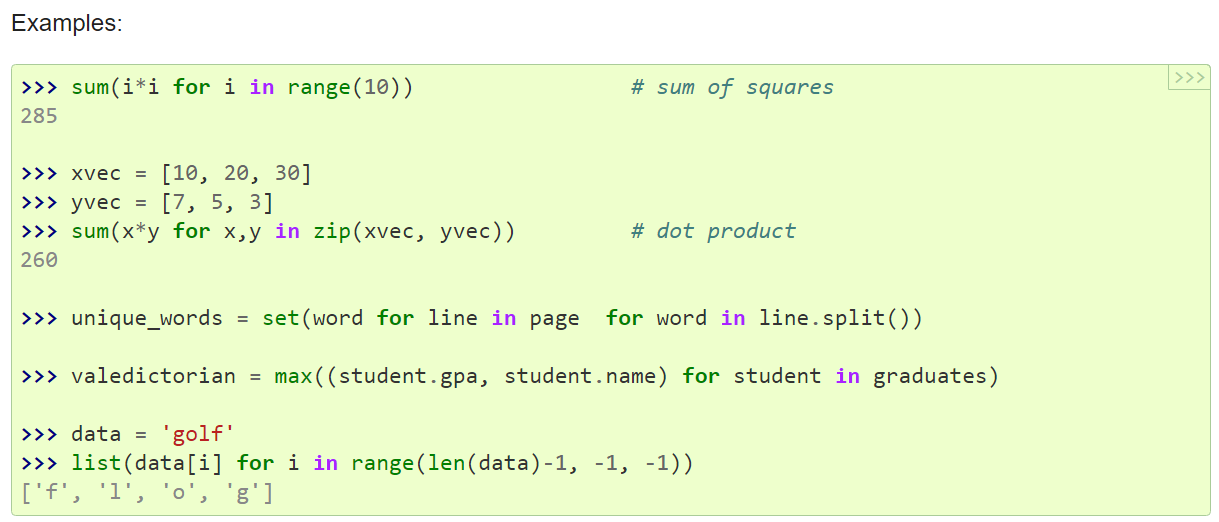

# Special Class Notes

If you were to run `type()` command on a class object, you will see that it is of the `object.__class__` type.

_**What about "private" variables?**_ More on that [here](https://docs.python.org/3/tutorial/classes.html#private-variables).

There is also [this Odds & Ends section](https://docs.python.org/3/tutorial/classes.html#odds-and-ends) that may be of interest, but leaves your code open to ambiguity.

# Class [Decorators](https://realpython.com/primer-on-python-decorators/)

More on this to come, but definitely check out the link for this until then!

# Additional Sites
1. PEP Style Guides:
    - [318:  Decorators For Functions & Methods](https://www.python.org/dev/peps/pep-0318/)
    - [352: Exceptions as New-Style Classes](https://docs.python.org/3/whatsnew/2.5.html#pep-352-exceptions-as-new-style-classes)
    - [487:  Simpler customization of class creation](https://docs.python.org/3/whatsnew/3.6.html#pep-487-simpler-customization-of-class-creation)
    - [520: Preserving Class Attribute Definition Order](https://docs.python.org/3/whatsnew/3.6.html#pep-520-preserving-class-attribute-definition-order)
    - [3119: Abstract Base Classes](https://docs.python.org/3/whatsnew/2.6.html#pep-3119-abstract-base-classes)
    - [3129: Class Decorators](https://docs.python.org/3/whatsnew/2.6.html#pep-3129-class-decorators)
    - [3155: Qualified name for classes and functions](https://docs.python.org/3/whatsnew/3.3.html#pep-3155-qualified-name-for-classes-and-functions)


2. Official Python Documentation
    - [Base Exception classes](https://docs.python.org/3/library/exceptions.html#base-classes)
    - [Collections](https://docs.python.org/3/library/collections.abc.html) - abstract base classes for containers


3. RealPyton:
    - [Object Oriented Programming (OOP)](https://realpython.com/python3-object-oriented-programming/)
    - [Primer on Python Decorators](https://realpython.com/primer-on-python-decorators/)
    - [Instance, Class, & Static Methods](https://realpython.com/instance-class-and-static-methods-demystified/)
    - [Multiple Contructors](https://realpython.com/python-multiple-constructors/)
    
    
4. On decorators:
    - [Primer On Function Decoratrs](https://realpython.com/primer-on-python-decorators/)
    - [Python decorators](https://www.geeksforgeeks.org/decorators-in-python/)